##### Importing *`Global Libraries`*

In [147]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

##### Loading *`battlestats`* and *`dex`* datasets from *`json`* format and arranging them in a `pandas dataframe`

In [148]:
# Loading the dataset
with open('./datasets/battlestats.json') as f:
    battlestats = json.load(f)

with open('./datasets/dex.json') as f:
    dex = json.load(f)

# Creating DataFrame and extracting data from json
data = battlestats['data']
df = pd.DataFrame()

for i in data:
    abilities = []
    for j in data[i]['Abilities']:
        abilities.append({j: data[i]['Abilities'][j]})
    abilities = [abilities]

    abilities = pd.DataFrame([abilities], columns=['Abilities'], index=[i])
    abilities['Pokemon'] = i
    abilities['Usage'] = data[i]['usage']
    abilities['RowCount'] = data[i]['Raw count']
    Happiness = []
    for j in data[i]['Happiness']:
        Happiness.append({j: data[i]['Happiness'][j]})

    Happiness = [Happiness]
    abilities['Happiness'] = Happiness
    for k in range(0, 4):
        abilities[f'Viability Ceiling {k}'] = data[i]['Viability Ceiling'][k]

    Teammates = []
    for j in data[i]['Teammates']:
        Teammates.append({j: data[i]['Teammates'][j]})
    Teammates = [Teammates]
    abilities['Teammates'] = Teammates
    name = i.lower()
    # if name contain any non alphanumeric character replace it with ''
    name = ''.join(e for e in name if e.isalpha())
    Types = []
    for j in dex[name]['types']:
        Types.append(j)
    Types = [Types]
    abilities['Types'] = Types
    abilities['hp'] = dex[name]['baseStats']['hp']
    abilities['atk'] = dex[name]['baseStats']['atk']
    abilities['def'] = dex[name]['baseStats']['def']
    abilities['spa'] = dex[name]['baseStats']['spa']
    abilities['spd'] = dex[name]['baseStats']['spd']
    abilities['spe'] = dex[name]['baseStats']['spe']
    abilities['bst'] = dex[name]['baseStats']['hp'] + dex[name]['baseStats']['atk'] + dex[name]['baseStats']['def'] + dex[name]['baseStats']['spa'] + dex[name]['baseStats']['spd'] + dex[name]['baseStats']['spe']
    abilities['weight'] = dex[name]['weightkg']
    abilities['height'] = dex[name]['heightm']
    abilities['color'] = dex[name]['color']
    try:
        gen = dex[name]['genderRatio']['M']
        if gen >= 0.5:
            gen = 'M'
        else:
            gen = 'F'
        abilities['Gender'] = gen
    except:
        abilities['Gender'] = 'N'
    # another try
    try:
        abilities['Gender'] = dex[name]['gender']
    except:
        pass

    df = pd.concat([df, abilities], ignore_index=True)



df.head(10)

,Abilities,Pokemon,Usage,RowCount,Happiness,Viability Ceiling 0,Viability Ceiling 1,Viability Ceiling 2,Viability Ceiling 3,Teammates,...,atk,def,spa,spd,spe,bst,weight,height,color,Gender
0,"[{'healer': 53.0}, {'magicbounce': 2276.0}]",Hattrem,0.000756,2329,[{'255': 2329.0}],59,74,74,58,"[{'Fletchinder': 6.0}, {'Iron Valiant': 115.0}...",...,40,65,86,73,49,370,4.8,0.6,Pink,F
1,[{'quarkdrive': 34661.0}],Iron Leaves,0.011033,34661,[{'255': 34661.0}],1178,86,76,60,"[{'Wugtrio': 6.0}, {'Iron Valiant': 5985.0}, {...",...,130,88,70,108,104,590,125.0,1.5,Green,N
2,[{'cursedbody': 60945.0}],Gengar,0.019336,60945,[{'255': 60945.0}],1727,83,73,55,"[{'Magnemite': 16.0}, {'Iron Leaves': 165.0}, ...",...,65,60,130,75,110,500,40.5,1.5,Purple,N
3,[{'quarkdrive': 574225.0}],Iron Valiant,0.184939,574225,[{'255': 574225.0}],14136,90,78,62,"[{'Iron Leaves': 5985.0}, {'Blissey': 2778.0},...",...,130,90,120,60,116,590,35.0,1.4,White,N
4,"[{'flamebody': 398707.0}, {'swarm': 18904.0}]",Volcarona,0.134519,417611,[{'255': 417611.0}],10309,87,79,62,"[{'Iron Leaves': 2146.0}, {'Blissey': 1761.0},...",...,60,65,135,105,100,550,46.0,1.6,White,N
5,"[{'anticipation': 340.0}, {'dryskin': 4660.0},...",Toxicroak,0.001995,6513,"[{'0': 4.0}, {'255': 6509.0}]",225,76,67,51,"[{'Iron Leaves': 20.0}, {'Wugtrio': 19.0}, {'I...",...,106,65,86,65,85,490,44.4,1.3,Blue,N
6,"[{'pressure': 1858.0}, {'infiltrator': 4170.0}]",Spiritomb,0.001884,6028,[{'255': 6028.0}],203,71,68,53,"[{'Iron Leaves': 8.0}, {'Blissey': 44.0}, {'Wu...",...,92,108,92,108,35,485,108.0,1.0,Purple,N
7,[{'myceliummight': 338.0}],Toedscool,0.000103,338,[{'255': 338.0}],26,73,73,55,"[{'Fletchinder': 2.0}, {'Bronzong': 4.0}, {'Vo...",...,40,35,50,100,70,335,33.0,0.9,Yellow,N
8,"[{'anticipation': 122.0}, {'runaway': 28.0}, {...",Eevee,0.000119,400,[{'255': 400.0}],17,44,44,44,"[{'Iron Valiant': 10.0}, {'Volcarona': 26.0}, ...",...,55,50,45,65,55,325,6.5,0.3,Brown,M
9,"[{'purifyingsalt': 2396.0}, {'clearbody': 46.0...",Naclstack,0.000752,2487,[{'255': 2487.0}],109,71,68,54,"[{'Hattrem': 12.0}, {'Iron Leaves': 8.0}, {'Fl...",...,60,100,35,65,35,355,105.0,0.5,Brown,N


##### *`Normalising`* the dataframe

##### Performing *`EDAs`* on the dataset to get a better understanding of the data

##### *`Null Check`* on the dataset

In [149]:
# check for null values in the dataset
print('Null Values in the dataframe-', df.isnull().sum())

# check for NaN values in the dataframe
print('NaN Values in the dataframe-', df.isna().sum())

Null Values in the dataframe- Abilities              0
Pokemon                0
Usage                  0
RowCount               0
Happiness              0
Viability Ceiling 0    0
Viability Ceiling 1    0
Viability Ceiling 2    0
Viability Ceiling 3    0
Teammates              0
Types                  0
hp                     0
atk                    0
def                    0
spa                    0
spd                    0
spe                    0
bst                    0
weight                 0
height                 0
color                  0
Gender                 0
dtype: int64
NaN Values in the dataframe- Abilities              0
Pokemon                0
Usage                  0
RowCount               0
Happiness              0
Viability Ceiling 0    0
Viability Ceiling 1    0
Viability Ceiling 2    0
Viability Ceiling 3    0
Teammates              0
Types                  0
hp                     0
atk                    0
def                    0
spa                    0
spd

##### *`DataFrame`* Information

In [150]:
print('Columns in the dataframe-', df.columns)

print(df.describe())

Columns in the dataframe- Index(['Abilities', 'Pokemon', 'Usage', 'RowCount', 'Happiness',
       'Viability Ceiling 0', 'Viability Ceiling 1', 'Viability Ceiling 2',
       'Viability Ceiling 3', 'Teammates', 'Types', 'hp', 'atk', 'def', 'spa',
       'spd', 'spe', 'bst', 'weight', 'height', 'color', 'Gender'],
      dtype='object')
            Usage      RowCount  Viability Ceiling 0  Viability Ceiling 1  \
count  258.000000  2.580000e+02           258.000000           258.000000   
mean     0.023167  7.229883e+04          1898.127907            76.139535   
std      0.050626  1.572810e+05          3730.118353             9.777481   
min      0.000102  3.380000e+02             6.000000            44.000000   
25%      0.000799  2.605000e+03           102.500000            70.000000   
50%      0.003238  1.040050e+04           345.500000            77.000000   
75%      0.014283  4.513600e+04          1368.000000            85.000000   
max      0.395241  1.221604e+06         24137.00

##### *`Correlation`* between the features

/tmp/ipykernel_334/2470037192.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


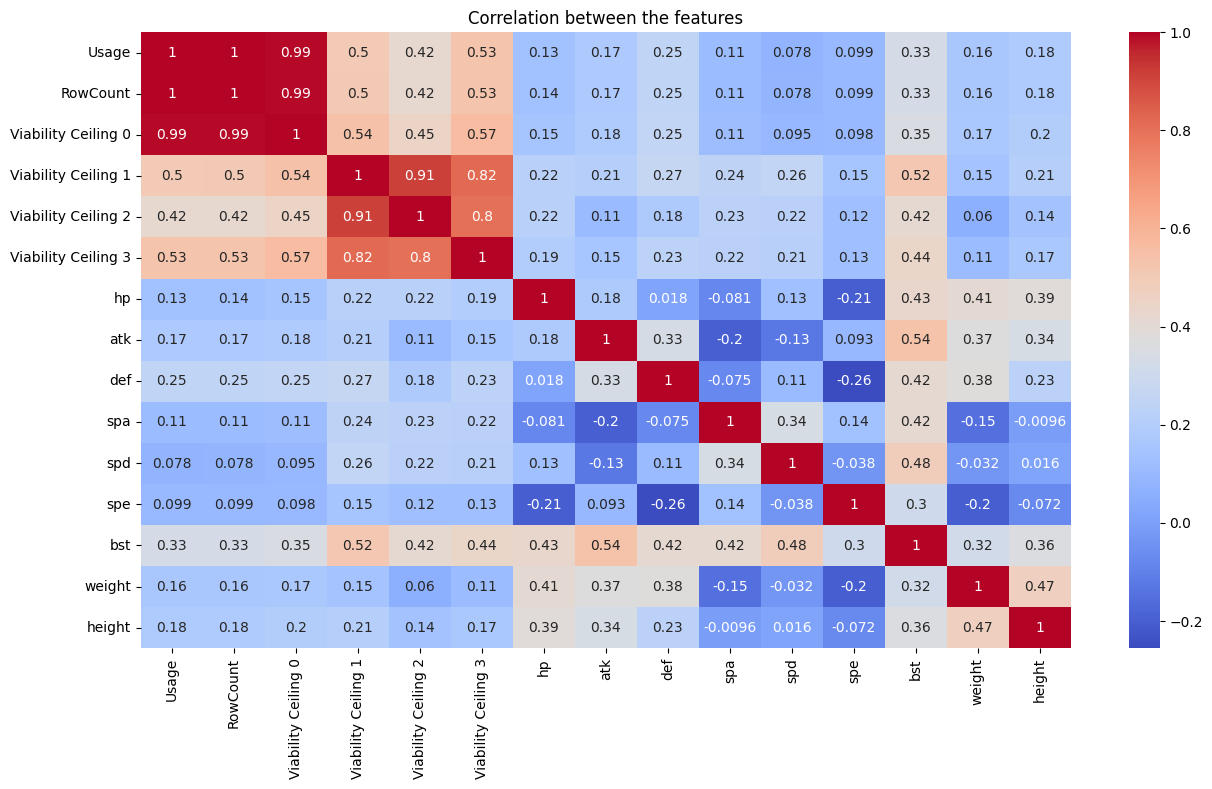

In [151]:
# heatmap of the dataframe to show distribution of correlation between the features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the features')
plt.show()

##### *`Countplot of Pokemon Types`*

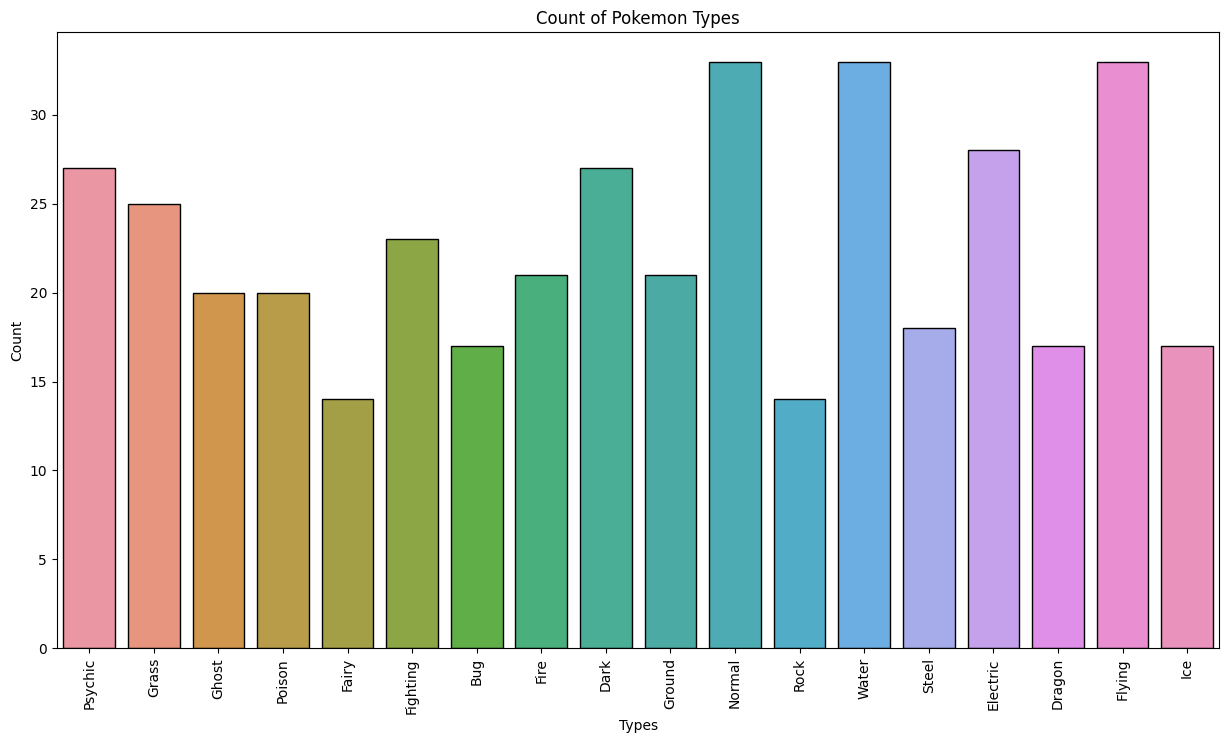

In [152]:
# countplot of the pokemon types
AllTypes = []
for i in df['Types']:
    for j in i:
        if j not in AllTypes:
            AllTypes.append(j)

AllTypes = pd.DataFrame(AllTypes, columns=['Types'])
AllTypes['Count'] = 0
for i in AllTypes['Types']:
    for j in df['Types']:
        if i in j:
            AllTypes.loc[AllTypes['Types'] == i, 'Count'] += 1

plt.figure(figsize=(15, 8))
sns.barplot(x='Types', y='Count', data=AllTypes, edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.title('Count of Pokemon Types')
plt.show()

##### *`Most Used Pokemon Types`*

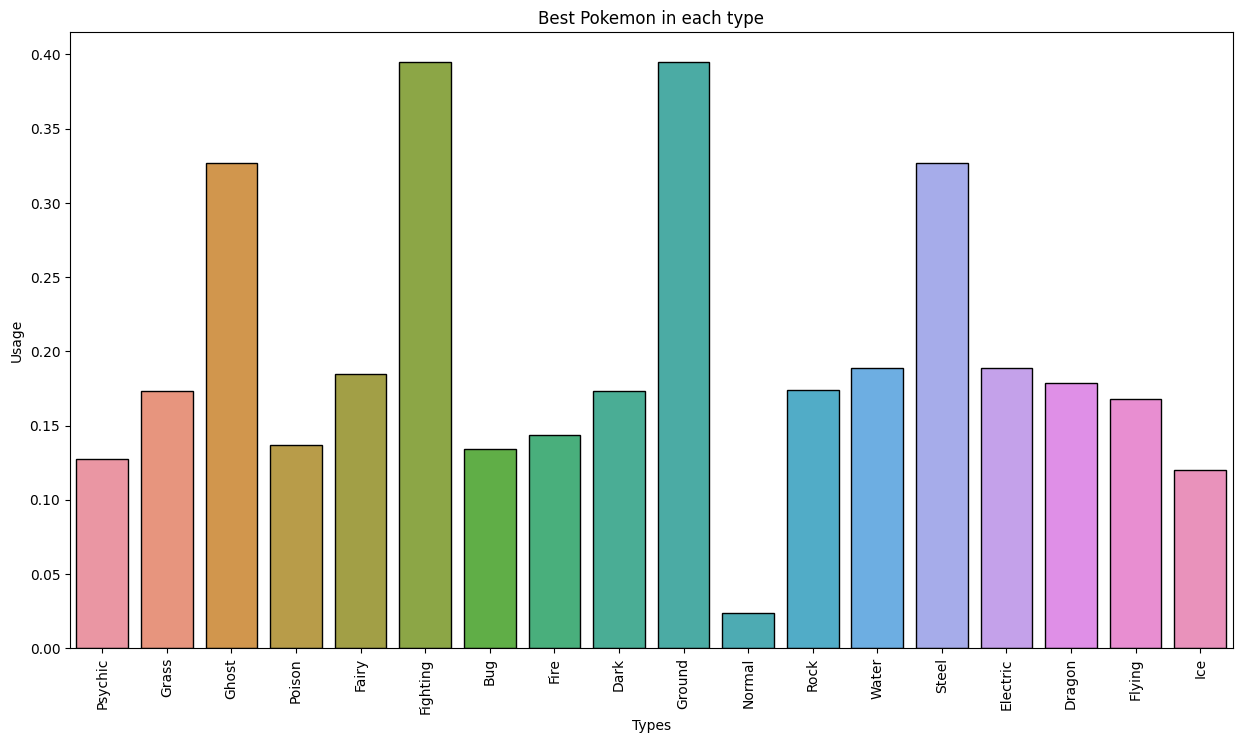

In [153]:
# Best pokemons in each type
BestPokemon = []
for i in AllTypes['Types']:
    BestPokemon.append(df.loc[df['Types'].apply(lambda x: i in x), 'Usage'].idxmax())

BestPokemon = pd.DataFrame(BestPokemon, columns=['BestPokemon'])
BestPokemon['Types'] = AllTypes['Types']
BestPokemon['Usage'] = 0
for i in BestPokemon['Types']:
    BestPokemon.loc[BestPokemon['Types'] == i, 'Usage'] = df.loc[df['Types'].apply(lambda x: i in x), 'Usage'].max()

plt.figure(figsize=(15, 8))
sns.barplot(x='Types', y='Usage', data=BestPokemon, edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.title('Best Pokemon in each type')
plt.show()

##### *`Best Pokemon`* in each type for *`Attack`*, *`Defense`*, *`Sp. Atk`*, *`Sp. Def`*, *`Speed`* and *`Hp`*

In [184]:
# Attack
BestAttack = []
for i in AllTypes['Types']:
    BestAttack.append(df.loc[df['Types'].apply(lambda x: i in x), 'atk'].idxmax())

BestAttack = pd.DataFrame(BestAttack, columns=['BestAttack'])
BestAttack['Types'] = AllTypes['Types']
BestAttack['atk'] = 0
for i in BestAttack['Types']:
    BestAttack.loc[BestAttack['Types'] == i, 'atk'] = df.loc[df['Types'].apply(lambda x: i in x), 'atk'].max()

# Defense
BestDefense = []
for i in AllTypes['Types']:
    BestDefense.append(df.loc[df['Types'].apply(lambda x: i in x), 'def'].idxmax())

BestDefense = pd.DataFrame(BestDefense, columns=['BestDefense'])
BestDefense['Types'] = AllTypes['Types']
BestDefense['def'] = 0
for i in BestDefense['Types']:
    BestDefense.loc[BestDefense['Types'] == i, 'def'] = df.loc[df['Types'].apply(lambda x: i in x), 'def'].max()

# Speed
BestSpeed = []
for i in AllTypes['Types']:
    BestSpeed.append(df.loc[df['Types'].apply(lambda x: i in x), 'spe'].idxmax())

BestSpeed = pd.DataFrame(BestSpeed, columns=['BestSpeed'])
BestSpeed['Types'] = AllTypes['Types']

BestSpeed['spe'] = 0
for i in BestSpeed['Types']:
    BestSpeed.loc[BestSpeed['Types'] == i, 'spe'] = df.loc[df['Types'].apply(lambda x: i in x), 'spe'].max()

# Special Attack
BestSpAtk = []
for i in AllTypes['Types']:
    BestSpAtk.append(df.loc[df['Types'].apply(lambda x: i in x), 'spa'].idxmax())

BestSpAtk = pd.DataFrame(BestSpAtk, columns=['BestSpAtk'])
BestSpAtk['Types'] = AllTypes['Types']
BestSpAtk['spa'] = 0
for i in BestSpAtk['Types']:
    BestSpAtk.loc[BestSpAtk['Types'] == i, 'spa'] = df.loc[df['Types'].apply(lambda x: i in x), 'spa'].max()

# Special Defense
BestSpDef = []
for i in AllTypes['Types']:
    BestSpDef.append(df.loc[df['Types'].apply(lambda x: i in x), 'spd'].idxmax())

BestSpDef = pd.DataFrame(BestSpDef, columns=['BestSpDef'])
BestSpDef['Types'] = AllTypes['Types']
BestSpDef['spd'] = 0
for i in BestSpDef['Types']:
    BestSpDef.loc[BestSpDef['Types'] == i, 'spd'] = df.loc[df['Types'].apply(lambda x: i in x), 'spd'].max()

# HP
BestHP = []
for i in AllTypes['Types']:
    BestHP.append(df.loc[df['Types'].apply(lambda x: i in x), 'hp'].idxmax())

BestHP = pd.DataFrame(BestHP, columns=['BestHP'])
BestHP['Types'] = AllTypes['Types']
BestHP['hp'] = 0
for i in BestHP['Types']:
    BestHP.loc[BestHP['Types'] == i, 'hp'] = df.loc[df['Types'].apply(lambda x: i in x), 'hp'].max()


fig = go.Figure()

fig.add_trace(go.Bar(
    x=BestAttack['Types'],
    y=BestAttack['atk'],
    name='Attack',
    marker_color='red',
    text=df.loc[BestAttack['BestAttack'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestDefense['Types'],
    y=BestDefense['def'],
    name='Defense',
    marker_color='blue',
    text=df.loc[BestDefense['BestDefense'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpeed['Types'],
    y=BestSpeed['spe'],
    name='Speed',
    marker_color='green',
    text=df.loc[BestSpeed['BestSpeed'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpAtk['Types'],
    y=BestSpAtk['spa'],
    name='Special Attack',
    marker_color='yellow',
    text=df.loc[BestSpAtk['BestSpAtk'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpDef['Types'],
    y=BestSpDef['spd'],
    name='Special Defense',
    marker_color='purple',
    text=df.loc[BestSpDef['BestSpDef'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestHP['Types'],
    y=BestHP['hp'],
    name='HP',
    marker_color='orange',
    text=df.loc[BestHP['BestHP'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.update_layout(
    title='Best Stats in Each Type',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Stat',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.show()

##### *`Distribution of Pokemon weights and heights`*

/tmp/ipykernel_334/668238641.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_334/668238641.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




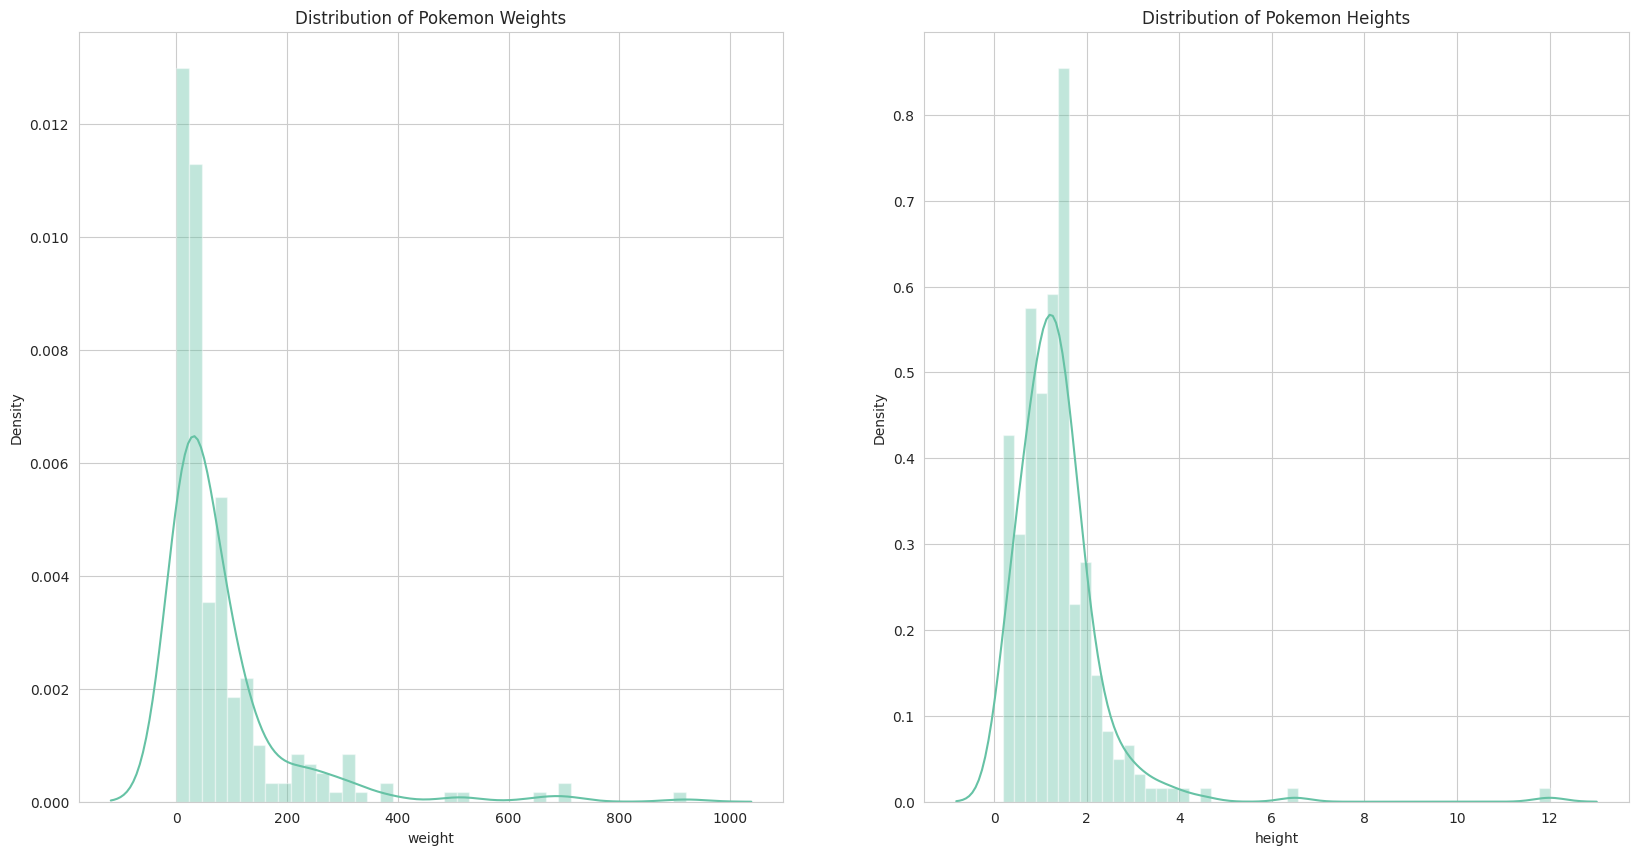

In [187]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df['weight'], ax=ax[0])
sns.distplot(df['height'], ax=ax[1])
ax[0].set_title('Distribution of Pokemon Weights')
ax[1].set_title('Distribution of Pokemon Heights')
plt.show()